<a href="https://colab.research.google.com/github/mohit1018102/ML_Project/blob/main/Lung_Cancer/LUNG_CANCER_XG_BOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOAD DATASET FROM DRIVE

In [36]:
import pandas as pd;
from google.colab import drive
drive.mount('/content/drive')
df=pd. read_csv("/content/drive/MyDrive/data/survey_lung_cancer.csv")
!mkdir /data
df.to_csv('/data/survey_lung_cancer.csv',index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘/data’: File exists


# Loading dataset using pandas

In [37]:
import pandas as pd
dataset=pd.read_csv("/data/survey_lung_cancer.csv")
dataset.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,MALE,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,MALE,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,FEMALE,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,MALE,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,FEMALE,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO
5,FEMALE,75,0,1,0,0,1,1,1,1,0,1,1,0,0,YES
6,MALE,52,1,0,0,0,0,1,0,1,1,1,1,0,1,YES
7,FEMALE,51,1,1,1,1,0,1,1,0,0,0,1,1,0,YES
8,FEMALE,68,1,0,1,0,0,1,0,0,0,0,0,0,0,NO
9,MALE,53,1,1,1,1,1,0,1,0,1,0,0,1,1,YES


# Preprocessing : Encoding categorical data

In [38]:
categorical_data=[columns for columns in dataset.columns if dataset[columns].dtypes=='object']
categorical_data

['GENDER', 'LUNG_CANCER']

In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

for col in categorical_data:
  dataset[col]=label_encoder.fit_transform(dataset[col])

dataset.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


# Split dataset

In [40]:
X=dataset.drop(columns=["LUNG_CANCER"],inplace=False)
Y=dataset["LUNG_CANCER"]
print(X.head())
#print(Y.head())

   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   69        0               1        1              0   
1       1   74        1               0        0              0   
2       0   59        0               0        0              1   
3       1   63        1               1        1              0   
4       0   63        0               1        0              0   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                0         1         0         1                  1         1   
1                1         1         1         0                  0         0   
2                0         1         0         1                  0         1   
3                0         0         0         0                  1         0   
4                0         0         0         1                  0         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
0                    1                      1     

In [41]:
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33, random_state=42)

In [42]:
y_train.head()

240    1
37     0
16     1
55     1
154    0
Name: LUNG_CANCER, dtype: int64

# Model : XGBOOST

In [43]:
from xgboost import XGBClassifier
model_xg=XGBClassifier()
model_xg.fit(x_train,y_train)
model_xg

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
y_pred=model_xg.predict(x_test)

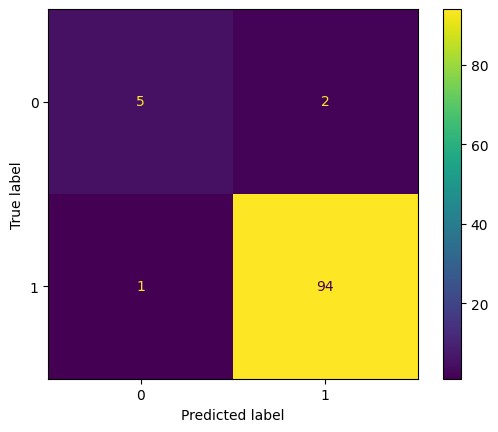

In [45]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
cm=confusion_matrix(y_test, y_pred,labels=model_xg.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xg.classes_)
disp.plot()


In [46]:
print(classification_report(y_test, y_pred,labels=model_xg.classes_))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.98      0.99      0.98        95

    accuracy                           0.97       102
   macro avg       0.91      0.85      0.88       102
weighted avg       0.97      0.97      0.97       102



# permutation importance

In [53]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model_xg, x_train, y_train, n_repeats=10,random_state=0)
importance=list(result.importances_mean)

In [54]:
columns=list(x_train.columns)
columns

['GENDER',
 'AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN']

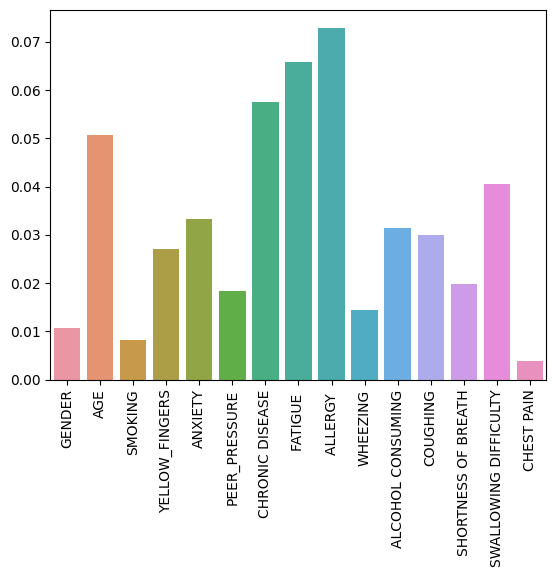

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=columns,y=importance)
plt.xticks(rotation=90)
plt.show()